customer booking predictions

testing algorithm accuracy for prediction(logistic regression)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load data
df = pd.read_csv("C:/Users/nikhi/Downloads/customer booking analysis/customer_booking.csv", encoding="ISO-8859-1")

# Step 2: Explore and preprocess
# print(df.info())  # Check data types
# print(df.isnull().sum())  # Check for null values

# Step 3: Define features and target

X = df.drop(columns=["booking_complete","wants_extra_baggage","wants_preferred_seat","wants_in_flight_meals"], axis=1)
y = df["booking_complete"]

# Step 4: Convert categorical columns (if any)
X = pd.get_dummies(X, drop_first=True)

# Step 5: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model=LogisticRegression(max_iter=3000).fit(X_train,y_train)

# Step 6: Scale data (important for Logistic Regression)

pipe=Pipeline(
   [("scaler",StandardScaler()),
    ("model",LogisticRegression())]
)



mod= GridSearchCV(estimator=pipe,param_grid={"verbose":[True,False]},cv=3)
mod.fit(X_train,y_train)
y_pred=mod.predict(X_test)

print(accuracy_score(y_pred,y_test))

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Step 7: Train model
# model = LogisticRegression()
# model.fit(X_train, y_train)

# # Step 8: Evaluate
# y_pred = model.predict(X_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# from sklearn.metrics import roc_curve, auc

# y_scores = model.predict_proba(X_test)[:, 1]  # get probability for class 1
# fpr, tpr, thresholds = roc_curve(y_test, y_scores)
# roc_auc = auc(fpr, tpr)

# plt.figure(figsize=(6, 4))
# plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # random guess line
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()


[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.5s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.8s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.4s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.8s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.5s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.7s
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.7s
[Pipeline] ............. (step 2 of 2) Processing model, total=   1.5s
0.8498
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.45      0.07      0.12      1480

    accuracy                           0.85     10000
   macro avg       0.65      0.53      0.52     10000
weighted avg       0.80      0.85      0.80     10000



finding important parameters or feature(Random forest classifier)

purchase_lead               0.148516
flight_hour                 0.124029
length_of_stay              0.111991
num_passengers              0.048408
flight_duration             0.036521
booking_origin_Malaysia     0.027503
wants_in_flight_meals       0.022433
booking_origin_Australia    0.022167
wants_preferred_seat        0.019578
flight_day_Mon              0.017231
dtype: float64


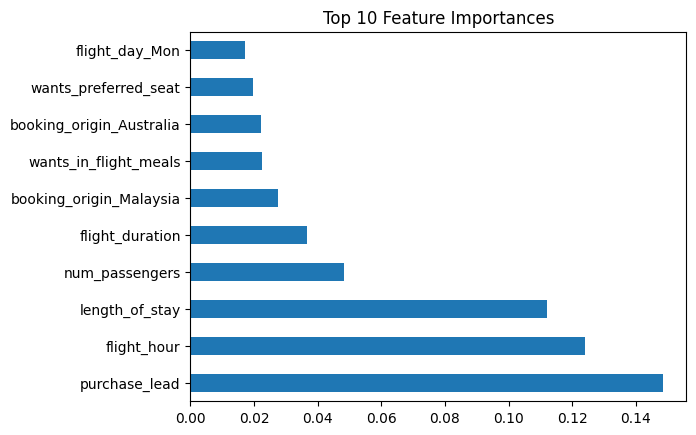

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load data
df = pd.read_csv("C:/Users/nikhi/Downloads/customer booking analysis/customer_booking.csv", encoding="ISO-8859-1")
X=df.drop("booking_complete",axis=1)
y=df['booking_complete']
X = pd.get_dummies(X, drop_first=True)

# Step 5: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = rf.feature_importances_

# Top features
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feat_imp.head(10))

# Visualize
feat_imp.head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()


In [4]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

finding important parameters or feature(Random forest classifier)

purchase_lead               0.150194
flight_hour                 0.123757
length_of_stay              0.112421
num_passengers              0.047738
flight_duration             0.036471
booking_origin_Malaysia     0.026604
wants_in_flight_meals       0.022894
booking_origin_Australia    0.022314
wants_preferred_seat        0.020023
wants_extra_baggage         0.017780
dtype: float64


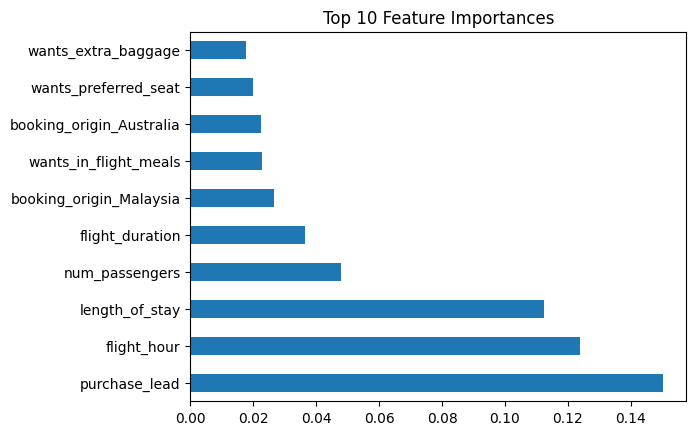

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load data
df = pd.read_csv("C:/Users/nikhi/Downloads/customer booking analysis/customer_booking.csv", encoding="ISO-8859-1")
X=df.drop(columns='booking_complete')
y=df['booking_complete']
X = pd.get_dummies(X, drop_first=True)

# Step 5: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf = RandomForestClassifier()
rf.fit(X_train, y_train)

importances = rf.feature_importances_

# Top features
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feat_imp.head(10))

# Visualize
feat_imp.head(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.show()

finding important parameters or feature(logestic regression)

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

import numpy as np

feature_names = X.columns
importance = model.coef_[0]

# Sort by absolute value
sorted_idx = np.argsort(np.abs(importance))[::-1]

for i in sorted_idx[:10]:
    print(f"{feature_names[i]}: {importance[i]:.4f}")


booking_origin_Australia: -1.5476
sales_channel_Mobile: -0.8422
booking_origin_Malaysia: 0.7628
booking_origin_South Korea: -0.7225
booking_origin_Taiwan: -0.6593
booking_origin_Indonesia: 0.6096
trip_type_RoundTrip: -0.5284
booking_origin_Thailand: 0.5058
booking_origin_Singapore: 0.4440
booking_origin_New Zealand: -0.4133


C:\Users\nikhi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


finding important parameters or feature( Decision tree classifier)


In [7]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [8]:
X_train.dtypes

num_passengers                         int64
purchase_lead                          int64
length_of_stay                         int64
flight_hour                            int64
wants_extra_baggage                    int64
                                       ...  
booking_origin_United Arab Emirates     bool
booking_origin_United Kingdom           bool
booking_origin_United States            bool
booking_origin_Vanuatu                  bool
booking_origin_Vietnam                  bool
Length: 918, dtype: object

In [9]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

prediction using DecisionTreeClassifier

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,QuantileTransformer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.compose import ColumnTransformer
X = df.drop(columns=["booking_complete"], axis=1)
y = df["booking_complete"]

categorical_columns=['sales_channel','trip_type','flight_day','route','booking_origin']
numerical_columns=['num_passengers','purchase_lead','length_of_stay','flight_hour']
preprocessor= ColumnTransformer(
    transformers=[
    ("cat",OneHotEncoder(handle_unknown="ignore"),categorical_columns),
    ("num",QuantileTransformer(),numerical_columns)
    ]
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model=RandomForestClassifier()
pipe=Pipeline(
    [("preprocessor",preprocessor),
     ("classifier",RandomForestClassifier())
    ]
)
param_grid = {
    "classifier__max_leaf_nodes": list(range(2, 23))
}

mod = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=3,
    scoring="accuracy",
    verbose=1
)

mod.fit(X_train,y_train)
y_predict=mod.predict(X_test)
print(accuracy_score(y_test,y_predict))
print(classification_report)


Fitting 3 folds for each of 21 candidates, totalling 63 fits
0.852
<function classification_report at 0x0000019994EBF740>


In [11]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__max_leaf_nodes,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.528455,0.013020,0.102811,0.005037,2,{'classifier__max_leaf_nodes': 2},0.850007,0.850071,0.850071,0.85005,0.00003,1
1,0.571859,0.061721,0.101607,0.003259,3,{'classifier__max_leaf_nodes': 3},0.850007,0.850071,0.850071,0.85005,0.00003,1
2,0.613618,0.038319,0.099294,0.002742,4,{'classifier__max_leaf_nodes': 4},0.850007,0.850071,0.850071,0.85005,0.00003,1
3,0.660161,0.021264,0.111458,0.009572,5,{'classifier__max_leaf_nodes': 5},0.850007,0.850071,0.850071,0.85005,0.00003,1
4,0.717794,0.038781,0.106837,0.002328,6,{'classifier__max_leaf_nodes': 6},0.850007,0.850071,0.850071,0.85005,0.00003,1
5,0.759423,0.040138,0.109151,0.004534,7,{'classifier__max_leaf_nodes': 7},0.850007,0.850071,0.850071,0.85005,0.00003,1
6,0.794840,0.014403,0.110732,0.003997,8,{'classifier__max_leaf_nodes': 8},0.850007,0.850071,0.850071,0.85005,0.00003,1
7,0.818313,0.035245,0.113141,0.003023,9,{'classifier__max_leaf_nodes': 9},0.850007,0.850071,0.850071,0.85005,0.00003,1
8,0.861293,0.026815,0.117368,0.000420,10,{'classifier__max_leaf_nodes': 10},0.850007,0.850071,0.850071,0.85005,0.00003,1
9,0.888163,0.009494,0.118872,0.001242,11,{'classifier__max_leaf_nodes': 11},0.850007,0.850071,0.850071,0.85005,0.00003,1
